## Reducción de dimensionalidad
### Motivación
La reducción de la dimensionalidad, como su nombre indica, es una serie de técnicas de procesado de datos para reducir el número de variables o atributos de nustro dataset. Su aplicación tiene diversas ventajas:

- Compresión: Menos variables implica menos cálculos, menos memoria y menos tiempo de procesamiento, tanto en entrenamiento como en inferencia.
- Eficacia: Menos variables implica menos ruido, menos redundancia y menos correlación, lo que puede mejorar la calidad de los modelos.
- Visualización: La visualización ayuda a comprender los datos, pero sólo se pueden visualizar datos en bajas dimensiones.

Estas técnicas forman parte del aprendizaje no supervisado.

### Ejemplos
Supongamos que tenemos un dataset con dos atributos, y que ambos representan la misma cantidad: una en cm y otra en mm. Claramente, no necesitamos dos variables. Claramente, no necesitamos dos variables, porque aportan más o menos lo mismo. No exactamente lo mismo, puesto que con el cambio de unidades y los redondeos hay ligeras variaciones ente unos valores y otros.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

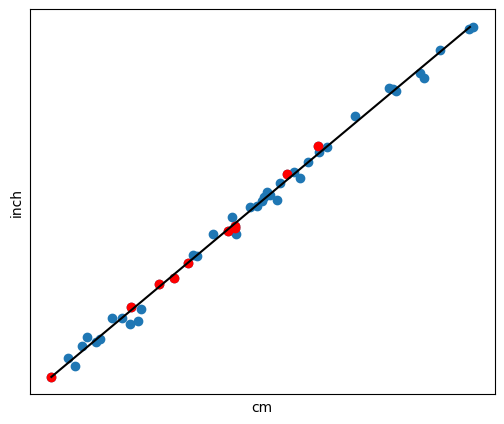

In [8]:
#Fijamos seed para controlar la aleatoriedad.
np.random.seed(2)

N = 50

# Una variables explicativas
x = np.random.uniform(0, 6, N)

x_color = x[:10]
# Parámetros verdaderos
w_true = 1.0

# Generar respuesta con algo de ruido
noise = np.random.normal(0, 0.1, N)
y = w_true * x + noise

# Visualización del dataset (2D, coloreado por y)
plt.figure(figsize=(6,5))
sc = plt.scatter(x, y)
sc = plt.scatter(x_color, y[:10], c='r')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-')
plt.tick_params(axis="both", length=0, labelbottom=False, labelleft=False) 
plt.xlabel("cm")
plt.ylabel("inch")
plt.show()

En realidad, querríamos reducir nuestros atributos de 2 dimensiones a 1.

\begin{align*}
x^{(1)} & = (x^{(1)}_1, x^{(1)}_2) \in \mathbb{R}^2 \mapsto z^{(1)} \in \mathbb{R} \\
x^{(1)} & = (x^{(1)}_1, x^{(1)}_2) \in \mathbb{R}^2 \mapsto z^{(1)} \in \mathbb{R} \\
\end{align*}

Es decir, queremos quedarnos con una recta, creando un nuevo atributo que con un único número tengamos más o menos ambas informaciones.

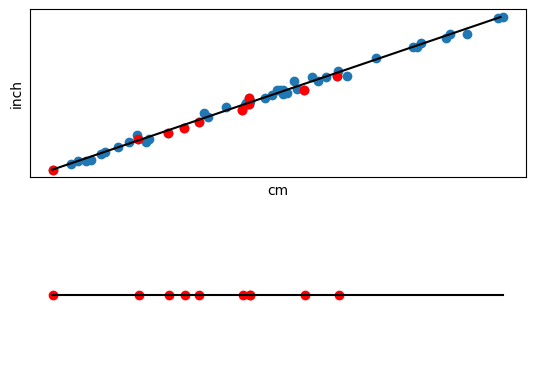

In [5]:
np.random.seed(2)

# Generar respuesta con algo de ruido
noise = np.random.normal(0, 0.1, N)
y = w_true * x + noise

# Visualización del dataset (2D, coloreado por y)
fig, ax = plt.subplots(2,1)
# plt.figure(figsize=(6,5))
ax[0].scatter(x, y)
ax[0].scatter(x_color, y[:10], c='r')
ax[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k-')
ax[0].tick_params(axis="both", length=0, labelbottom=False, labelleft=False) 
ax[0].set(xlabel="cm", ylabel="inch")
ax[1].scatter(x_color, len(x_color)*[0], c='r')
ax[1].tick_params(axis="both", length=0, labelbottom=False, labelleft=False) 
ax[1].plot([y.min(), y.max()], [0,0], 'k-')
ax[1].set_axis_off()
plt.show()

De manera análoga, podemos querer pasar de tres atributos a dos.

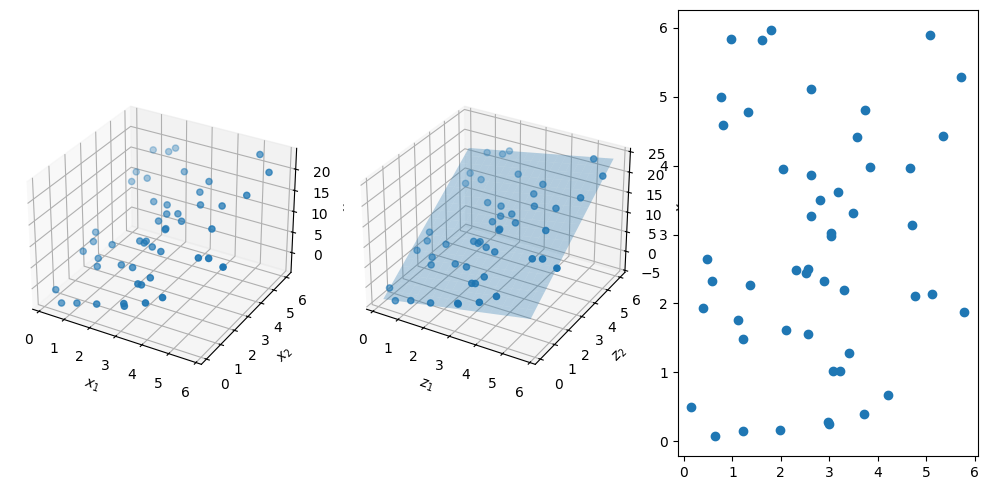

In [6]:
np.random.seed(2)

# Dos variables explicativas
x = np.random.uniform(0, 6, N)
y = np.random.uniform(0, 6, N)

# Generar respuesta con algo de ruido
w_1_true = 1.2
w_2_true = 3.5
b_true = -4
noise = np.random.normal(0, 0.1, N)
z =  w_1_true * x +  w_2_true * y + b_true
z_noise = w_1_true * x +  w_2_true * y + b_true + noise

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(x, y, z_noise)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$x_3$')

xx, yy = np.meshgrid(np.linspace(min(x), max(x), 20),
                     np.linspace(min(y), max(y), 20))

# Solve for z
zz =  w_1_true * xx +  w_2_true * yy + b_true

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(x, y, z)
ax2.plot_surface(xx, yy, zz, alpha=0.3)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$x_3$')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x, y)
ax2.set_xlabel('$z_1$')
ax2.set_ylabel('$z_2$')


plt.tight_layout()
plt.show()

Veamos otro ejemplo sobre la utilidad de la reducción de dimensionalidad.

Supongamos que tenemos el siguiente dataset: